In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from taxitools import utils

In [2]:
df = utils.open_taxi_clean_df()

In [3]:
df['pickup_weekday'] = df['lpep_pickup_datetime'].dt.dayofweek+1 #The day of the week with Monday=1, Sunday=7.
df['dropoff_weekday'] = df['lpep_dropoff_datetime'].dt.dayofweek+1
weekday_dict = {1: "Monday", 
                2: "Tuesday",
                3: "Wednesday",
                4: "Thursday",
                5: "Friday",
                6: "Saturday",
                7: "Sunday"}
df = df.replace({"pickup_weekday": weekday_dict})
df = df.replace({"dropoff_weekday": weekday_dict})
df['pickup_weekday'] = pd.Categorical(df['pickup_weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
df['dropoff_weekday'] = pd.Categorical(df['dropoff_weekday'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

In [4]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

In [5]:
df['pickup_monthday'] = df['lpep_pickup_datetime'].dt.day
df['dropoff_monthday'] = df['lpep_dropoff_datetime'].dt.day

In [6]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,hour_of_day,trip_duration,total_without_tip,fare_per_mile,pickup_weekday,dropoff_weekday,pickup_hour,dropoff_hour,pickup_monthday,dropoff_monthday
0,1,2021-07-01 00:30:52,2021-07-01 00:35:36,N,1,74,168,1,1.20,6.0,...,0,284.0,7.3,6.08,Thursday,Thursday,0,0,1,1
1,2,2021-07-01 00:25:36,2021-07-01 01:01:31,N,1,116,265,2,13.69,42.0,...,0,2155.0,43.3,3.16,Thursday,Thursday,0,1,1,1
2,2,2021-07-01 00:05:58,2021-07-01 00:12:00,N,1,97,33,1,0.95,6.5,...,0,362.0,7.8,8.21,Thursday,Thursday,0,0,1,1
3,2,2021-07-01 00:41:40,2021-07-01 00:47:23,N,1,74,42,1,1.24,6.5,...,0,343.0,7.8,6.29,Thursday,Thursday,0,0,1,1
4,2,2021-07-01 00:51:32,2021-07-01 00:58:46,N,1,42,244,1,1.10,7.0,...,0,434.0,8.3,7.55,Thursday,Thursday,0,0,1,1


# General analysis for time of the day:
## + What are the busiest hours in the day, calculated by the number of rows for each hour (comparing weekends to weekdays) -> double bar chart

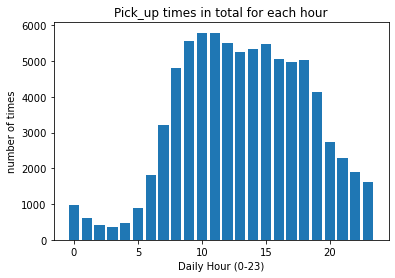

In [7]:
# Plot the `pickup_hour` for all dates.
dd = pd.DataFrame(df.groupby(["pickup_hour"])["pickup_hour"].count())
dd.index.name = 'hour'
dd.reset_index(inplace=True)
plt.bar(dd.hour,dd.pickup_hour)
plt.xlabel("Daily Hour (0-23)")
plt.ylabel("number of times")
plt.title("Pick_up times in total for each hour")
plt.savefig("figures/pick_up_times_per_hour.png")

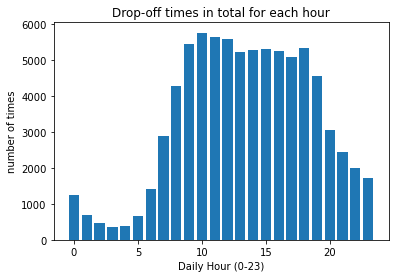

In [8]:
# Plot the `dropoff_hour` for all dates.
dd = pd.DataFrame(df.groupby(["dropoff_hour"])["dropoff_hour"].count())
dd.index.name = 'hour'
dd.reset_index(inplace=True)
plt.bar(dd.hour,dd.dropoff_hour)
plt.xlabel("Daily Hour (0-23)")
plt.ylabel("number of times")
plt.title("Drop-off times in total for each hour")
plt.savefig("figures/drop_off_times_per_hour.png")


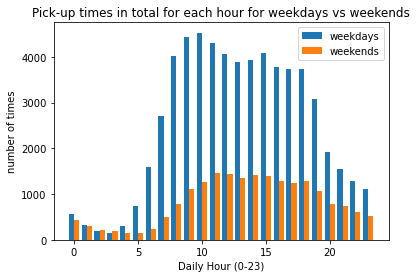

In [9]:
# Plot the `pickup_hour` for weekdays vs weekends.
d1 = pd.DataFrame(df[~df["pickup_weekday"].isin(["Saturday","Sunday"])].groupby(["pickup_hour"])["pickup_hour"].count())
d2 = pd.DataFrame(df[df["pickup_weekday"].isin(["Saturday","Sunday"])].groupby(["pickup_hour"])["pickup_hour"].count())
d1.index.name = 'hour'
d2.index.name = 'hour'
d1.reset_index(inplace=True)
d2.reset_index(inplace=True)
plt.bar(d1.hour-0.2,d1.pickup_hour,0.4,label = 'weekdays')
plt.bar(d2.hour+0.2,d2.pickup_hour,0.4,label = 'weekends')
plt.legend()
plt.xlabel("Daily Hour (0-23)")
plt.ylabel("number of times")
plt.title("Pick-up times in total for each hour for weekdays vs weekends")
plt.savefig("figures/pick_up_weekdays_vs_weekends.png")


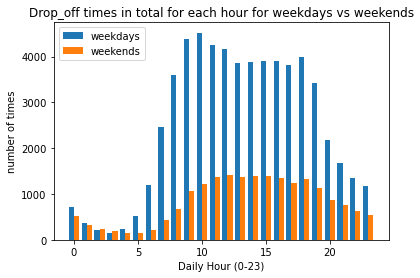

In [10]:
# Plot the `dropoff_hour` for weekdays vs weekends.
d1 = pd.DataFrame(df[~df["dropoff_weekday"].isin(["Saturday","Sunday"])].groupby(["dropoff_hour"])["dropoff_hour"].count())
d2 = pd.DataFrame(df[df["dropoff_weekday"].isin(["Saturday","Sunday"])].groupby(["dropoff_hour"])["dropoff_hour"].count())
d1.index.name = 'hour'
d2.index.name = 'hour'
d1.reset_index(inplace=True)
d2.reset_index(inplace=True)
plt.bar(d1.hour-0.2,d1.dropoff_hour,0.4,label = 'weekdays')
plt.bar(d2.hour+0.2,d2.dropoff_hour,0.4,label = 'weekends')
plt.legend()
plt.xlabel("Daily Hour (0-23)")
plt.ylabel("number of times")
plt.title("Drop_off times in total for each hour for weekdays vs weekends")
plt.savefig("figures/drop_off_weekdays_vs_weekends.png")

# How do fares (cost/mile) change based on time

## + Fares vs hour of the day

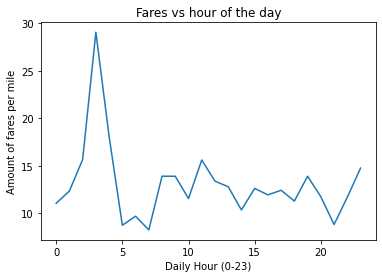

In [11]:
plt.plot(utils.aggregateAndGroup(df, 'pickup_hour', 'fare_per_mile', 'mean'))
plt.xlabel("Daily Hour (0-23)")
plt.ylabel("Amount of fares per mile")
plt.title("Fares vs hour of the day")
plt.savefig("figures/fares_vs_hour_of_the_day.png")


## + Fares vs day of the week

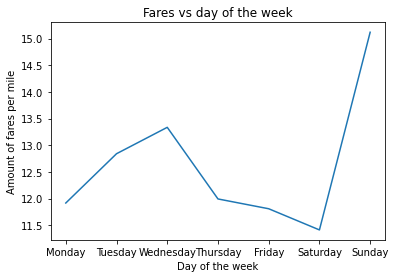

In [12]:
# Fares vs day of the week
dd = utils.aggregateAndGroup(df, 'pickup_weekday', 'fare_per_mile', 'mean')
dd.index.name = 'pickup_weekday'
dd.reset_index(inplace=True)
plt.plot(dd.pickup_weekday,dd.fare_per_mile)
plt.xlabel("Day of the week")
plt.ylabel("Amount of fares per mile")
plt.title("Fares vs day of the week")
plt.savefig("figures/fares_vs_day_of_the_week.png")


## + Fares vs day of the month

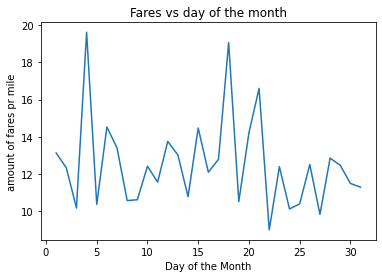

In [13]:
plt.plot(utils.aggregateAndGroup(df, 'pickup_monthday', 'fare_per_mile', 'mean'))
plt.xlabel("Day of the Month")
plt.ylabel("amount of fares pr mile")
plt.title("Fares vs day of the month")
plt.savefig("figures/fares_vs_day_of_the_month.png")